In [19]:
import pandas as pd
import numpy as np
data = pd.read_csv('bitcoin_dataset.csv')

In [21]:
pip install numpy

In [22]:
data.fillna(method = 'pad',  inplace=True)

In [23]:
data.corr()

,btc_market_price,btc_total_bitcoins,btc_market_cap,btc_trade_volume,btc_blocks_size,btc_avg_block_size,btc_n_orphaned_blocks,btc_n_transactions_per_block,btc_median_confirmation_time,btc_hash_rate,...,btc_cost_per_transaction_percent,btc_cost_per_transaction,btc_n_unique_addresses,btc_n_transactions,btc_n_transactions_total,btc_n_transactions_excluding_popular,btc_n_transactions_excluding_chains_longer_than_100,btc_output_volume,btc_estimated_transaction_volume,btc_estimated_transaction_volume_usd
btc_market_price,1.000000,0.505525,0.998754,0.865614,0.778021,0.638733,-0.018435,0.634141,0.382253,0.936906,...,-0.018871,0.508885,0.693405,0.638983,0.783734,0.636030,0.676992,0.144627,0.079349,0.932600
btc_total_bitcoins,0.505525,1.000000,0.489149,0.391915,0.768629,0.837847,0.308633,0.820593,0.696329,0.527690,...,-0.078306,0.377003,0.827909,0.826449,0.774751,0.802607,0.788120,0.309123,0.248380,0.493419
btc_market_cap,0.998754,0.489149,1.000000,0.866591,0.779411,0.636537,-0.029707,0.633002,0.376324,0.945049,...,-0.017602,0.469657,0.689647,0.636787,0.784467,0.634003,0.676252,0.147048,0.080443,0.935001
btc_trade_volume,0.865614,0.391915,0.866591,1.000000,0.630227,0.515164,-0.023372,0.511709,0.302398,0.807068,...,-0.014272,0.404864,0.576021,0.527044,0.634651,0.521878,0.554926,0.149404,0.102057,0.871744
btc_blocks_size,0.778021,0.768629,0.779411,0.630227,1.000000,0.956080,0.108767,0.950862,0.515373,0.878161,...,-0.029240,0.231905,0.968330,0.953484,0.999742,0.956806,0.967324,0.262282,0.175618,0.784662
btc_avg_block_size,0.638733,0.837847,0.636537,0.515164,0.956080,1.000000,0.196051,0.979900,0.564447,0.737542,...,-0.035374,0.170507,0.979507,0.982198,0.954729,0.979142,0.971025,0.306362,0.212774,0.665710
btc_n_orphaned_blocks,-0.018435,0.308633,-0.029707,-0.023372,0.108767,0.196051,1.000000,0.161314,0.101980,-0.049741,...,-0.016111,0.109584,0.188796,0.158485,0.109986,0.164069,0.119567,0.008783,0.031096,-0.033215
btc_n_transactions_per_block,0.634141,0.820593,0.633002,0.511709,0.950862,0.979900,0.161314,1.000000,0.568462,0.734131,...,-0.034814,0.156386,0.973841,0.981642,0.949488,0.976211,0.975676,0.306682,0.208186,0.662572
btc_median_confirmation_time,0.382253,0.696329,0.376324,0.302398,0.515373,0.564447,0.101980,0.568462,1.000000,0.400548,...,-0.052813,0.159293,0.534143,0.560165,0.522496,0.520063,0.543245,0.322131,0.240831,0.381425
btc_hash_rate,0.936906,0.527690,0.945049,0.807068,0.878161,0.737542,-0.049741,0.734131,0.400548,1.000000,...,-0.017227,0.299102,0.784631,0.751021,0.880362,0.750741,0.790310,0.194838,0.114140,0.919492


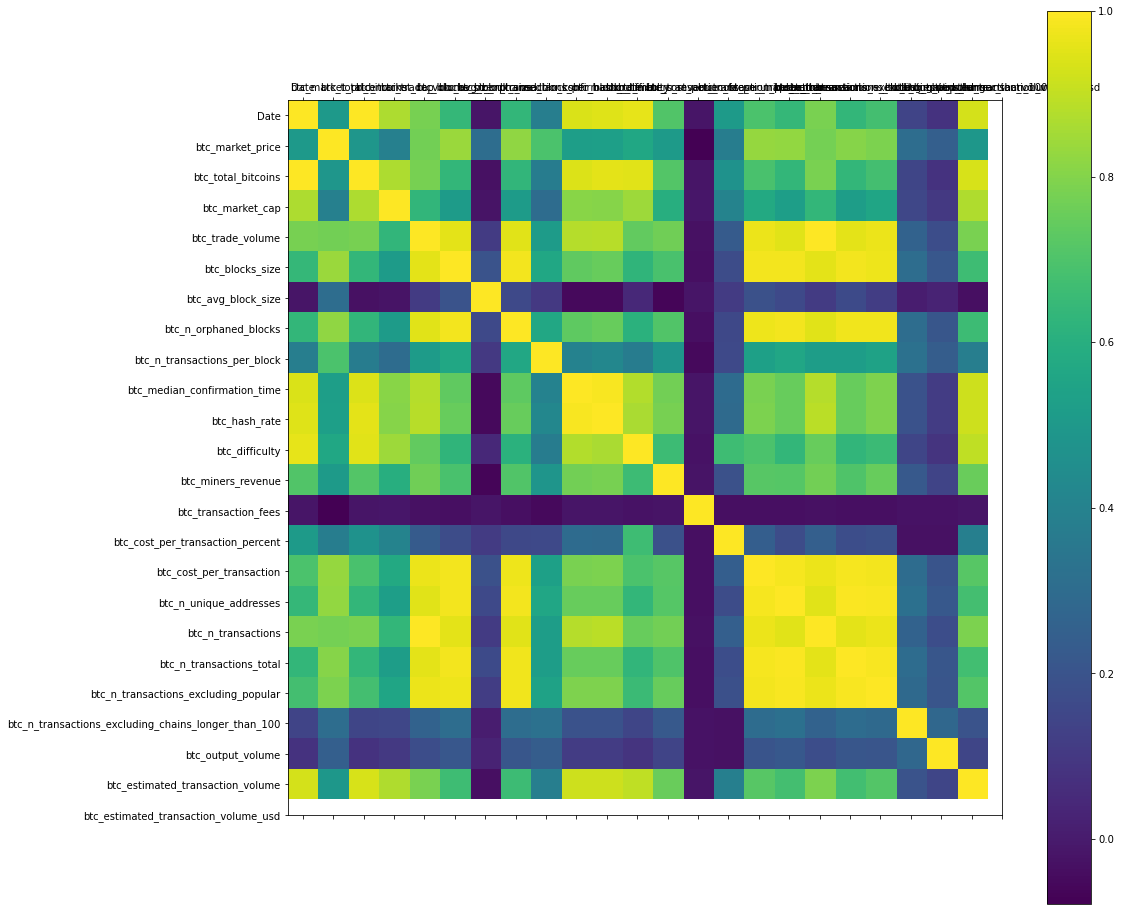

In [26]:
import matplotlib.pyplot as plt
plt.matshow(data.corr())
plt.rcParams["figure.figsize"] = [10.00, 5.00]
plt.rcParams["figure.autolayout"] = True 
plt.xticks(range(len(data.columns)), data.columns)
plt.yticks(range(len(data.columns)), data.columns)
plt.colorbar()
plt.show()

In [93]:
data_new = data.drop(['Date','btc_market_cap', 'btc_miners_revenue'], axis = 1)

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
train_d1 = scaler.fit_transform(data_new)
train_d2 = pd.DataFrame(train_d1,columns=data_new.columns)

In [94]:
import warnings
warnings.filterwarnings("ignore")

X = train_d2.iloc[:, 1:21]
y = train_d2.iloc[:, 0]

X = pd.DataFrame(X)
y = pd.DataFrame(y)

import random
random.seed(1234)
#we use random seed to make sure that we get same raining and validation data set

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=0)


from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score




In [95]:
random.seed(1234)

# Grid Search to find Optical parameter Values  
from sklearn.neighbors import KNeighborsRegressor 
from sklearn.model_selection import GridSearchCV

# prepare a range of alpha values to test
k_range = np.array([1,2,3,4,5,6,7,8,9,10])

knn = KNeighborsRegressor(n_neighbors=k_range)
grid = GridSearchCV(knn, param_grid=dict(n_neighbors=k_range), cv= 5)
grid.fit(X, y)
print("grid:",grid)

# summarize the results of the grid search
print("grid.best_score_:",grid.best_score_)
print("grid.best_estimator_:",grid.best_estimator_.n_neighbors)

# Model for best neighbour
model = KNeighborsRegressor(n_neighbors=10)
knn = model.fit(X_train, y_train)
knn_pred = knn.predict(X_test)

# train score
scores =  cross_val_score(model, X_train, y_train,cv=5)
print("R-squared score for training",scores.mean())

#test score
scores = cross_val_score(knn,y_test,knn_pred,cv=5)
print("R-squared score for testing", scores.mean())

#MSE
print ("Mean Square error", mean_squared_error(y_test, knn.predict(X_test)))
from sklearn.metrics import r2_score
print(r2_score(y_test, knn.predict(X_test)))

grid: GridSearchCV(cv=5,
             estimator=KNeighborsRegressor(n_neighbors=array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])})
grid.best_score_: -6.407323215737134
grid.best_estimator_: 10
R-squared score for training 0.9818947802091434
R-squared score for testing 0.9859430599338529
Mean Square error 0.00017351992831652233
0.9894337064535452


In [96]:
#dropping the target variable
bitcoin = bitcoin.drop(['Date', 'btc_market_cap','btc_miners_revenue'], axis = 1,errors = 'ignore')

feature_names_bitcoin = [ 'btc_total_bitcoins','btc_trade_volume', 'btc_blocks_size', 'btc_avg_block_size', 'btc_n_orphaned_blocks', 'btc_n_transactions_per_block', 'btc_median_confirmation_time', 'btc_hash_rate', 'btc_difficulty', 'btc_transaction_fees', 'btc_cost_per_transaction_percent', 'btc_cost_per_transaction', 'btc_n_unique_addresses', 'btc_n_transactions', 'btc_n_transactions_total', 'btc_n_transactions_excluding_popular', 'btc_n_transactions_excluding_chains_longer_than_100', 'btc_output_volume', 'btc_estimated_transaction_volume', 'btc_estimated_transaction_volume_usd']
X_bitcoin = bitcoin[feature_names_bitcoin]
y_bitcoin = bitcoin['btc_market_price']

test = pd.read_csv('test_set.csv')
test_new = test.drop(['Date','btc_market_cap', 'btc_miners_revenue'], axis = 1)

In [87]:
random.seed(1234)

model = KNeighborsRegressor(n_neighbors=10)
knn = model.fit(X_bitcoin, y_bitcoin)
knn_pred = knn.predict(test_new)

print('Predicted market prices of bitcoin: \n', pd.DataFrame((knn_pred), columns = ['Predicted_btc_market_price']))

Predicted market prices of bitcoin: 
     Predicted_btc_market_price
0                  6847.675483
1                  6847.675483
2                  6718.123972
3                  6847.675483
4                  6814.338560
5                  6814.338560
6                  6814.338560
7                  6847.675483
8                  6847.675483
9                  6685.206245
10                 6685.206245
11                 6718.123972
12                 6596.886500
13                 6718.123972
